In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 16:20:13 2023

@author: williamnehemia
"""

import os

import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtXLarge, EfficientNetV2B2, EfficientNetB7, NASNetLarge, NASNetMobile, MobileNetV2, Xception
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout, GlobalMaxPooling2D, Conv2D

base_dir = '/Users/williamnehemia/Documents/Bangkit-Course/download_image/Fast Food Classification V2'
#base_dir = '/Users/williamnehemia/Documents/Bangkit-Course/download_image/Fast_food_classification'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')


def create_model():
    IMAGE_SIZE = [224, 224]

    base =  Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

    for layer in base.layers:
        layer.trainable = False

    x = base.output
    
  
    x = GlobalMaxPooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    prediction = Dense(9, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=prediction)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=['accuracy']
    )



    return model

  
  
  


# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

val_generator =  val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
test = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

val = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=val_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)





2023-05-30 13:15:03.562342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


83683744/83683744 [==============================] - 70s 1us/step
Found 9747 images belonging to 9 classes.
Found 3172 images belonging to 9 classes.
Found 1670 images belonging to 9 classes.
Found 3172 images belonging to 9 classes.
Epoch 1/200


2023-05-30 13:16:22.677856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
/Users/williamnehemia/anaconda3/envs/Capstone/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2023-05-30 13:17:35.375043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 171s - loss: 2.2398 - accuracy: 0.1195 - val_loss: 2.2021 - val_accuracy: 0.0955 - 171s/epoch - 2s/step
Epoch 2/200
100/100 - 159s - loss: 2.1980 - accuracy: 0.1135 - val_loss: 2.2027 - val_accuracy: 0.0920 - 159s/epoch - 2s/step
Epoch 3/200
100/100 - 150s - loss: 2.1967 - accuracy: 0.1200 - val_loss: 2.2049 - val_accuracy: 0.0955 - 150s/epoch - 2s/step
Epoch 4/200
100/100 - 147s - loss: 2.1978 - accuracy: 0.1017 - val_loss: 2.2005 - val_accuracy: 0.0890 - 147s/epoch - 1s/step
Epoch 5/200
100/100 - 156s - loss: 2.1973 - accuracy: 0.1188 - val_loss: 2.2007 - val_accuracy: 0.0970 - 156s/epoch - 2s/step
Epoch 6/200
100/100 - 167s - loss: 2.1979 - accuracy: 0.1070 - val_loss: 2.2002 - val_accuracy: 0.0885 - 167s/epoch - 2s/step
Epoch 7/200
100/100 - 156s - loss: 2.1969 - accuracy: 0.1210 - val_loss: 2.2001 - val_accuracy: 0.0885 - 156s/epoch - 2s/step
Epoch 8/200
100/100 - 150s - loss: 2.1981 - accuracy: 0.1030 - val_loss: 2.1998 - val_accuracy: 0.0980 - 150s/epoch - 2s/step
Epoc

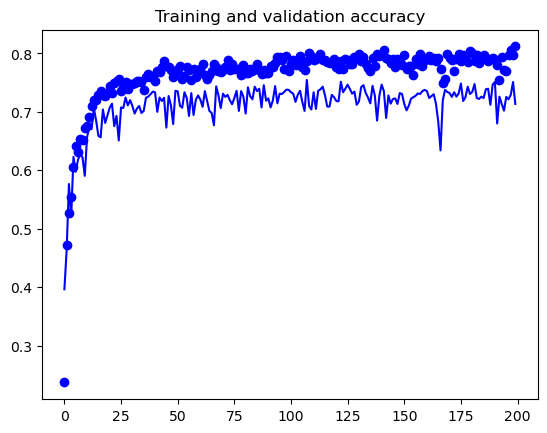

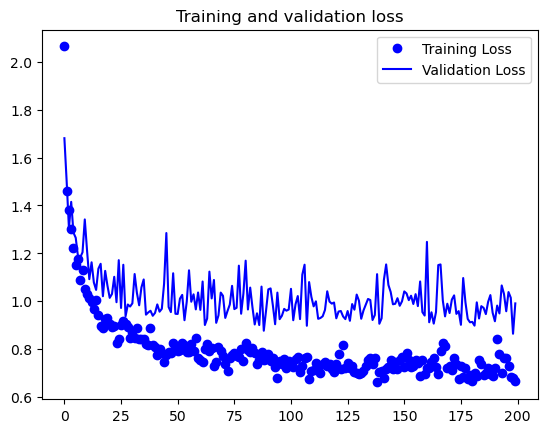

In [6]:


import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
  
plot_loss_acc(history_with_aug)